# Código TP1: Generación de Datos y Ajuste de Modelos

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
import pandas as pd

# Ejercicio 1

## Ejercicio 1a (Diagonal)

In [8]:
def diagonal(d: int, C: float, n: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Genera sampleos de dos gausianas d-dimensionales en posición diagonal
    (una respecto a la otra), con dispersión C * sqrt(d).
    Cada sampleo posee n/2 puntos.

    Argumentos:
        d: número de dimensiones
        C: constante de ajuste de dispersión

    Retorna:
        X: matriz con d columnas y n filas de datos
        y: arreglo de n elementos con las clases correspondientes
            a cada fila de datos
    """
    data1 = np.random.multivariate_normal(np.full(d, -1) , np.diag([(C * np.sqrt(d))**2]*d), n//2)
    data2 = np.random.multivariate_normal(np.full(d, 1) , np.diag([(C * np.sqrt(d))**2]*d), n//2)
    data = [[0, *x] for x in data1] + [[1, *x] for x in data2]
    df = pd.DataFrame(data, columns=(['Clase'] + ['d' + str(x + 1) for x in range(d)]))

    X = df.iloc[:, 1:].to_numpy()
    y = df.iloc[:, 0].to_numpy()
    return X, y

## Ejercicio 1b (Espirales)

In [9]:
def espirales(n: int) -> Tuple[np.ndarray, np.ndarray]:
    """ Generador de espirales """
    # Generar puntos en coordenadas polares
    n_per_class = n // 2
    g1 = []
    g2 = []

    while (len(g1) < n_per_class or  len(g2) < n_per_class):

        # Generar punto aleatorio en un círculo de radio 1
        r = np.sqrt(np.random.uniform(0, 1))
        theta = np.random.uniform(-2 * np.pi, 5 * np.pi)

        # Convertir a coordenadas cartesianas
        x = r * np.cos(theta)
        y = r * np.sin(theta)

        # Determinar la clase del punto
        condition1 = (r >= theta / (4 * np.pi)) and (r <= (theta + np.pi) / (4 * np.pi))
        condition2 =  (r <= theta / (4 * np.pi)) and (r >= (theta - np.pi) / (4 * np.pi))

        if condition1 and len(g1) < n_per_class:
            g1.append((x, y))
        elif condition2 and len(g2) < n_per_class:
            g2.append((x, y))
            
    data1 = np.array(g1)
    data2 = np.array(g2)

    data = [[0, *x] for x in data1] + [[1, *x] for x in data2]
    df = pd.DataFrame(data, columns=(['Clase'] + ['d' + str(x + 1) for x in range(2)]))

    X = df.iloc[:, 1:].to_numpy()
    y = df.iloc[:, 0].to_numpy()        

    return X, y 

## Ejercicio 1c (N-Gausianas)

In [10]:
def ngausianas(d: int, medias: np.ndarray, desvios: np.ndarray) -> \
        Tuple[np.ndarray, np.ndarray]:
    """ Generador de gausianas """
    assert(medias.shape[0] == desvios.shape[0]), \
        print('Medias y sds tienen distinto nro. de elementos.')

    pass  # COMPLETAR

    return X, y

## Ejercicio 1d: Gráficos

In [40]:
# Generación de datos (útil también para testear las funciones)


diag1_X, diag1_y = diagonal(d=2, C=0.3, n=300)
diag2_X, diag2_y = diagonal(d=2, C=0.3, n=10000)

espirales1_X, espirales1_y = espirales(n=300)
espirales2_X, espirales2_y = espirales(n=10000)

# n-gaussianas
# medias = np.array([[-2,-2],[4,0],[1.4,5],[-2,2]])
# sds = np.array([1, 1, 0.5, 0.5])
# ngausianas_X, ngausianas_y = ngausianas(d=2, medias=medias, desvios=sds)


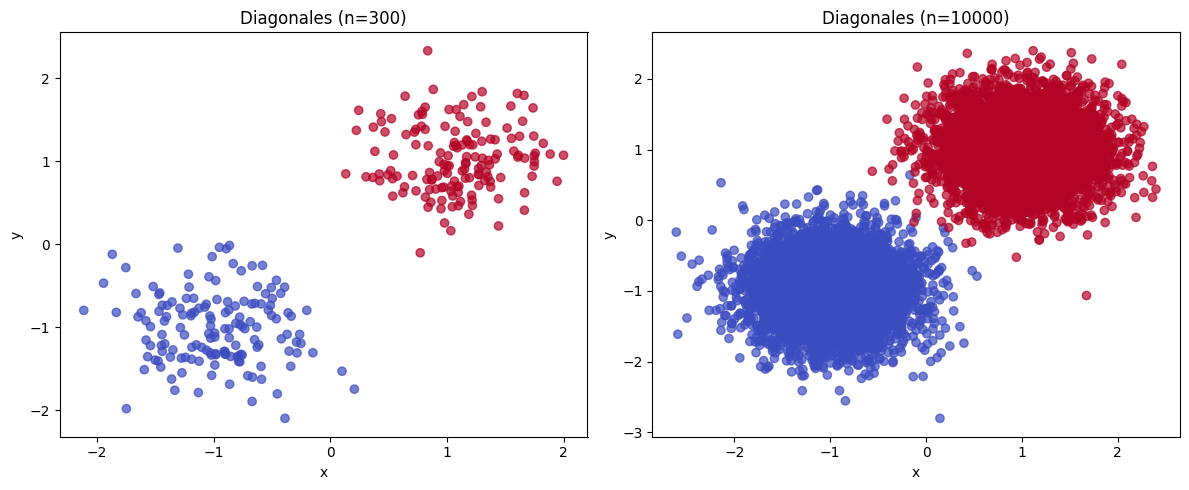

In [41]:
# Gráfica de datos generados: Diagonales
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Diagonales n=300
axs[0].scatter(diag1_X[:, 0], diag1_X[:, 1], c=diag1_y, cmap='coolwarm', alpha=0.7)
axs[0].set_title('Diagonales (n=300)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Diagonales n=10000
axs[1].scatter(diag2_X[:, 0], diag2_X[:, 1], c=diag2_y, cmap='coolwarm', alpha=0.7)
axs[1].set_title('Diagonales (n=10000)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

plt.tight_layout()
plt.show()

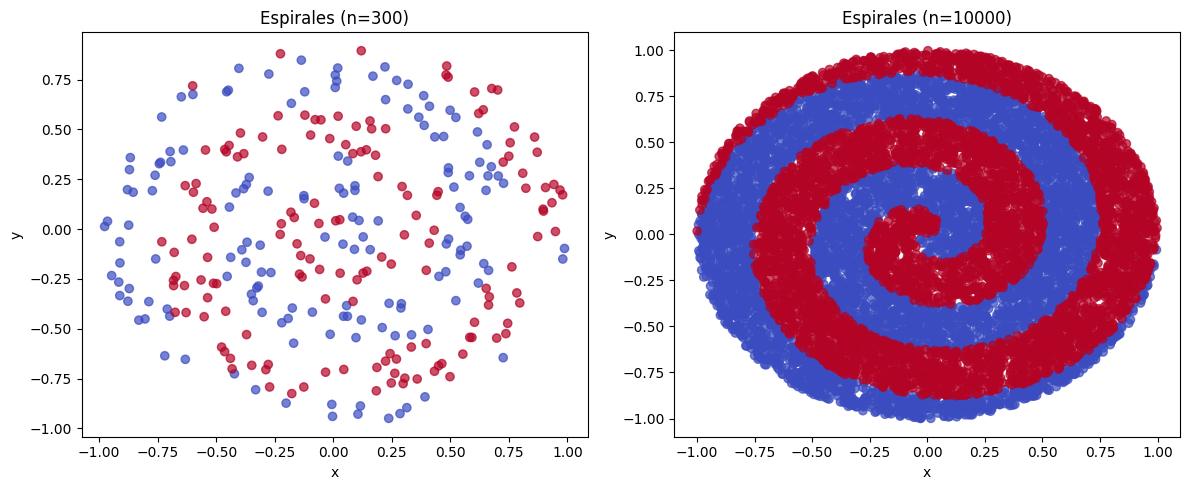

In [28]:
# Gráfica de datos generados: Espirales
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Espirales n=300
axs[0].scatter(espirales1_X[:, 0], espirales1_X[:, 1], c=espirales1_y, cmap='coolwarm', alpha=0.7)
axs[0].set_title('Espirales (n=300)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Espirales n=10000
axs[1].scatter(espirales2_X[:, 0], espirales2_X[:, 1], c=espirales2_y, cmap='coolwarm', alpha=0.7)
axs[1].set_title('Espirales (n=10000)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

plt.tight_layout()
plt.show()

# Ejercicio 2 (Ajuste de Modelos)

In [46]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

In [54]:
def trainTreePlot(xTrain, yTrain, xTest, yTest, plot=True):

    clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    clf.fit(xTrain, yTrain)

    res = clf.predict(xTest)
    clase1 = [xTest[i] for i in range(len(xTest)) if res[i] == 0]
    clase2 = [xTest[i] for i in range(len(xTest)) if res[i] == 1]

    xs0 = [x for [x,y] in clase1]
    ys0 = [y for [x,y] in clase1]
    xs1 = [x for [x,y] in clase2]
    ys1 = [y for [x,y] in clase2]


    if plot:
        plt.scatter(xs0, ys0, color='red', s=15)
        plt.scatter(xs1, ys1, color='blue', s=15)

        plt.show()
    else:
        errTrain = 1 - clf.score(xTrain, yTrain)
        errTest = 1 - clf.score(xTest, yTest)
        node_count = clf.tree_.node_count


        return errTrain, errTest, node_count, accuracy_score(yTest, res)


A continuación se grafican las predicciones sobre el conjunto de test de los arboles de decisión entrenados con 300 puntos para los conjuntos de datos de diagonales y espirales respectivamente:

(0.0033333333333332993, 0.010700000000000043, 5, 0.9893)


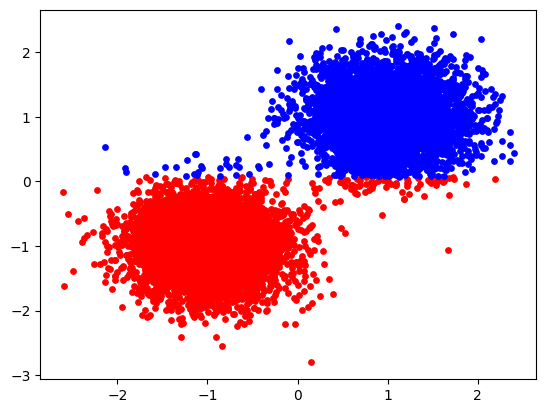

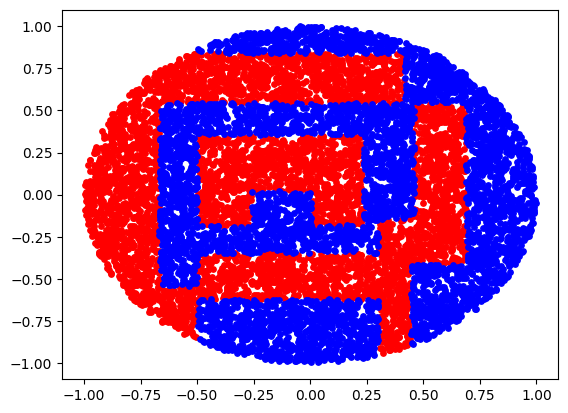

In [63]:
print(trainTreePlot(diag1_X, diag1_y, diag2_X, diag2_y, False))

trainTreePlot(diag1_X, diag1_y, diag2_X, diag2_y)
trainTreePlot(espirales1_X, espirales1_y, espirales2_X, espirales2_y)

# Ejercicio 3 (Visualización)

In [16]:
import seaborn as sns  # visualización estilo matplotlib, trae datasets
import plotly as ply
from sklearn.datasets import load_iris  # clásico dataset de juguete
from pandas.plotting import parallel_coordinates, andrews_curves, radviz
from plotly.graph_objects import Scatterpolar

# https://pypi.org/project/ChernoffFace/
! pip install git+https://github.com/antononcube/Python-packages.git#egg=ChernoffFace\&subdirectory=ChernoffFace --quiet
from ChernoffFace import chernoff_face

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Cargado de Datasets

# Iris (numerico, limpio)
iris = load_iris(as_frame=True)
df_iris = iris.frame
df_iris['species'] = iris.target_names[iris.target]

# Titanic (desprolijo, mix de categorico y numérico)
df_titanic = sns.load_dataset("titanic")

# Preview
print("Iris dataset:")
display(df_iris.head())
print("\nTitanic dataset:")
display(df_titanic.head())

## Ejercicio 3a: Biplots

In [ ]:
# construimos el biplot (pairplot en seaborn)
sns.pairplot(...) # COMPLETAR

# graficamos
plt.suptitle("Biplot de Iris")
plt.show()

# Ejercicio 3b: Coordenadas Paralelas

In [ ]:
parallel_coordinates(...) # COMPLETAR

# graficamos
plt.title("Coordenadas Paralelas de Iris")
plt.show()

# Ejercicio 3c: Star Plots

In [ ]:
fig = ply.graph_objects.Figure(...) # COMPLETAR

trace = ply.graph_objects.Scatterpolar(...) # COMPLETAR
fig.add_trace(trace, ...)  # COMPLETAR

# graficamos con plotly
fig.show()

# Ejercicio 3d: Chernoffs Faces

In [ ]:
# Tengan en cuenta el reescalado de variables de la librería
# `variables_rescale(...)`, ¿qué hace?

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    face = chernoff_face(...)  # COMPLETAR
    face.plot(ax=ax)
    ax.set_title(...)  # COMPLETAR
plt.suptitle("Chernoff Faces de Iris")
plt.show()